## Student Performance Indicator


This project understands how a student's performance is affected by factors such as gender, race/ethnicity, parental level of education, lunch and test preparation course

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


#### Show Top 5 Records

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Check statistics of data set

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.8 Adding columns for "Total Score" and "Average"

In [10]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# 4. Exploring Data ( Visualization )
4.1 Visualize average score distribution to make some conclusion. 


#### 4.1.1 Histogram & KDE

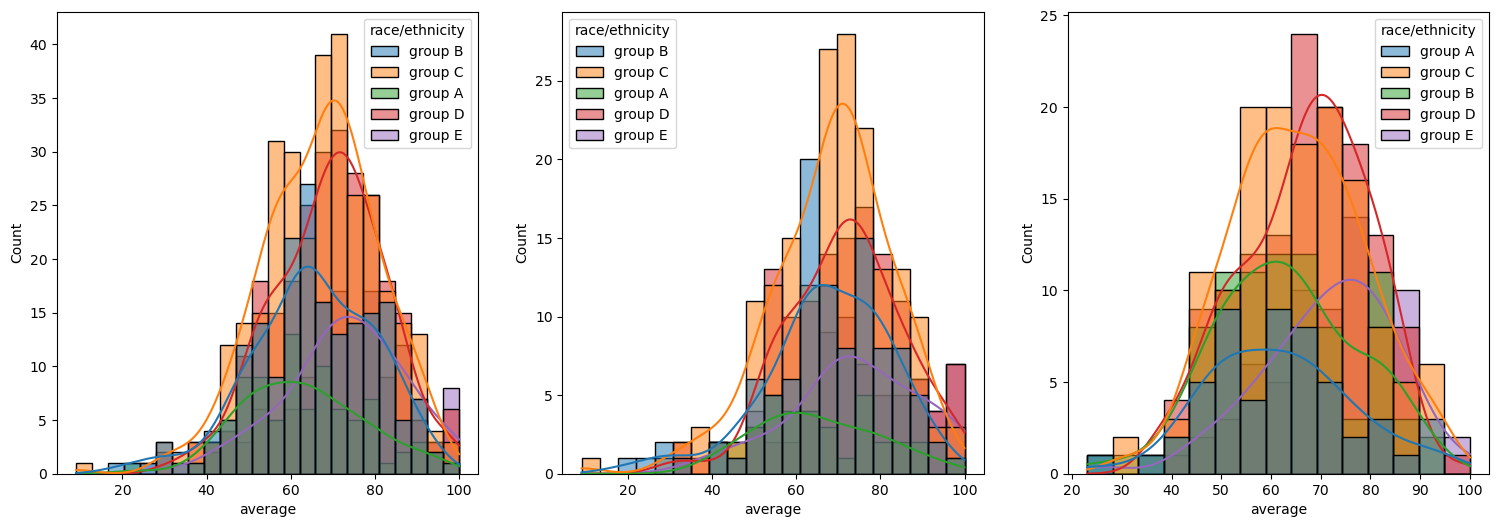

In [11]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

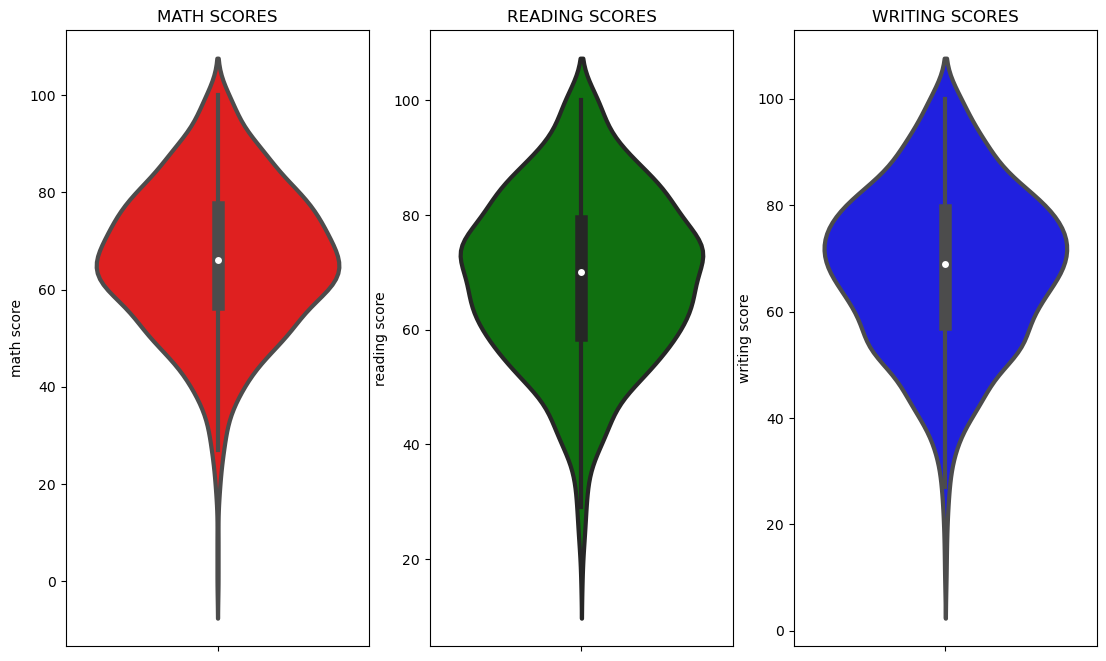

In [12]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

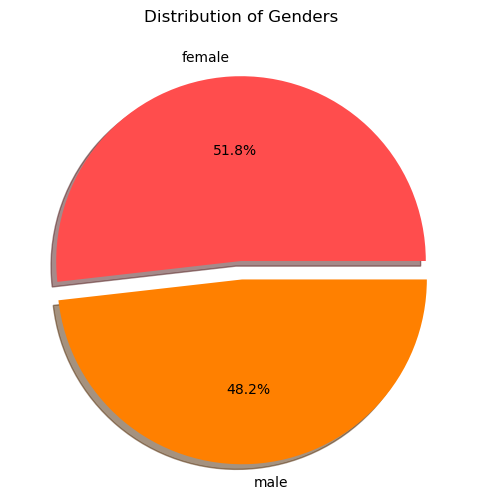

In [13]:
gender_counts = df['gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values
colors = ['#ff4d4d','#ff8000']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True,explode=[0,0.1])
plt.title('Distribution of Genders')

plt.show()

 Insights 
- Gender has balanced data with female students are 48% and male students are 482 52%

In [14]:
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


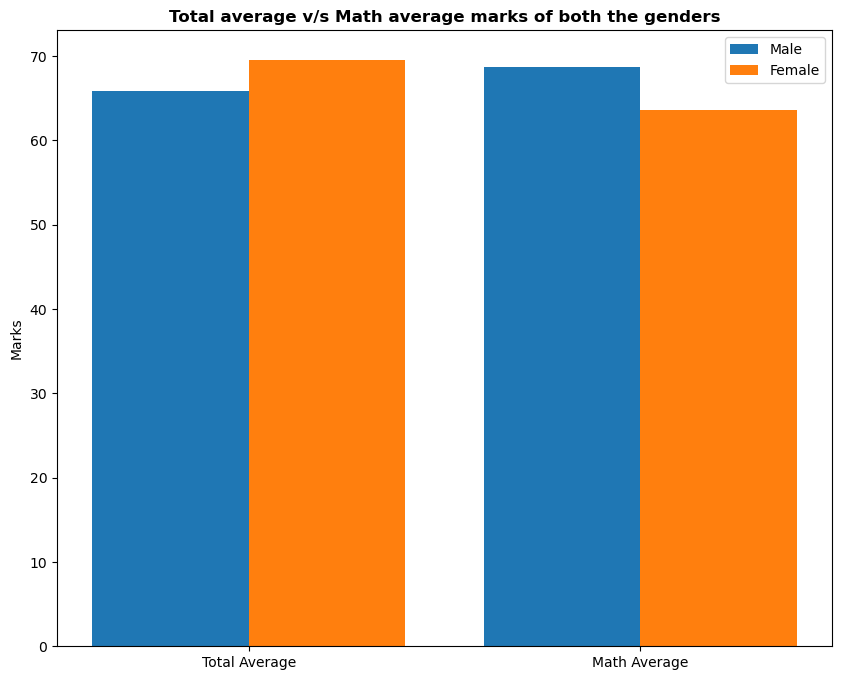

In [15]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

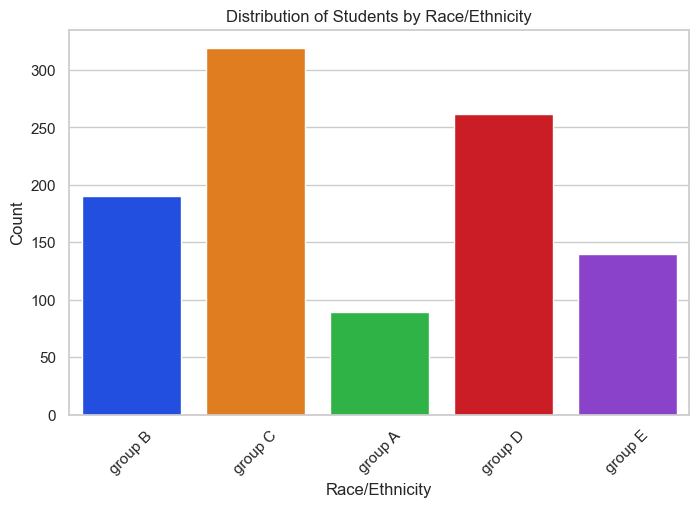

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Create a count plot for 'race/ethnicity'
sns.countplot(x='race/ethnicity', data=df, palette='bright')

plt.title('Distribution of Students by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

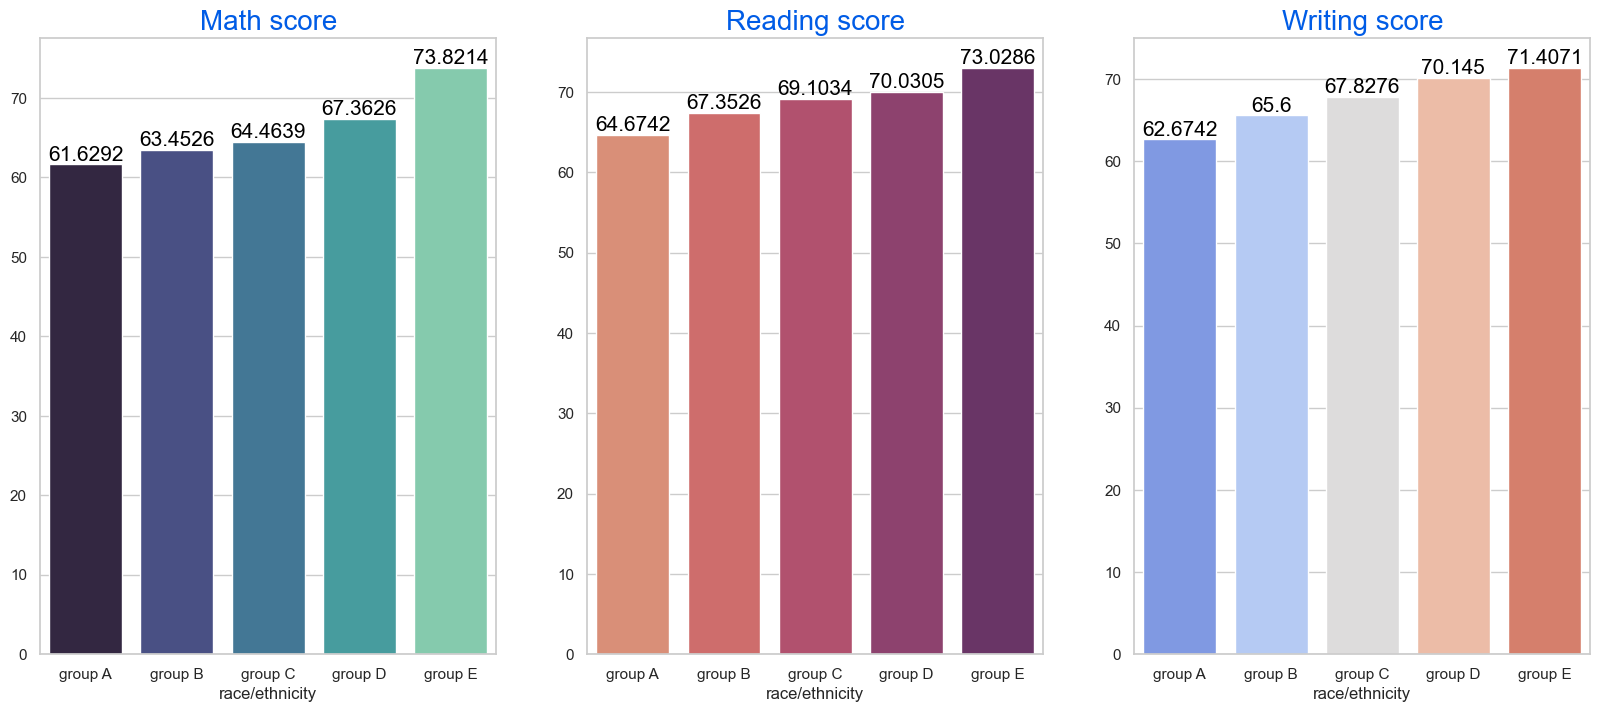

In [17]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

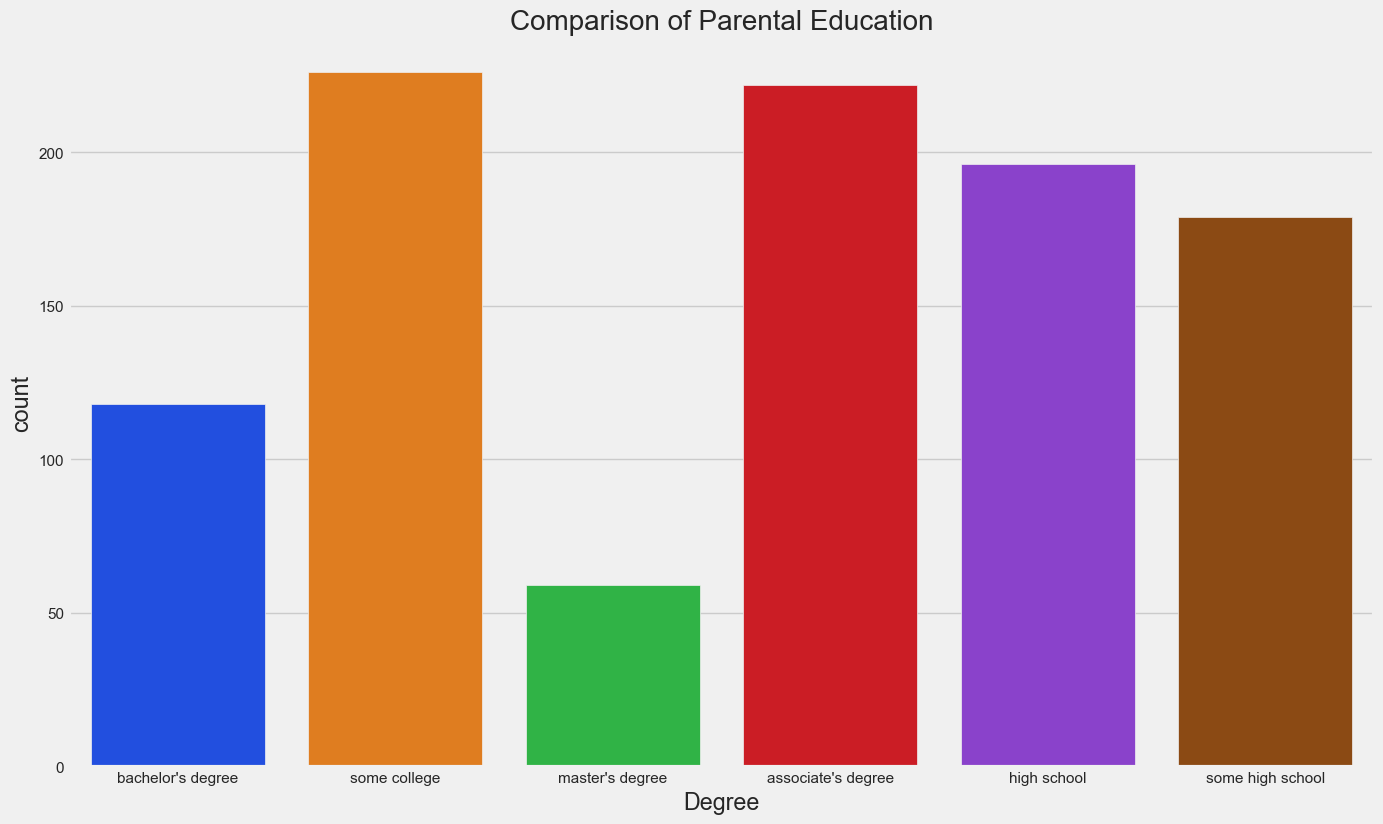

In [18]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'bright')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

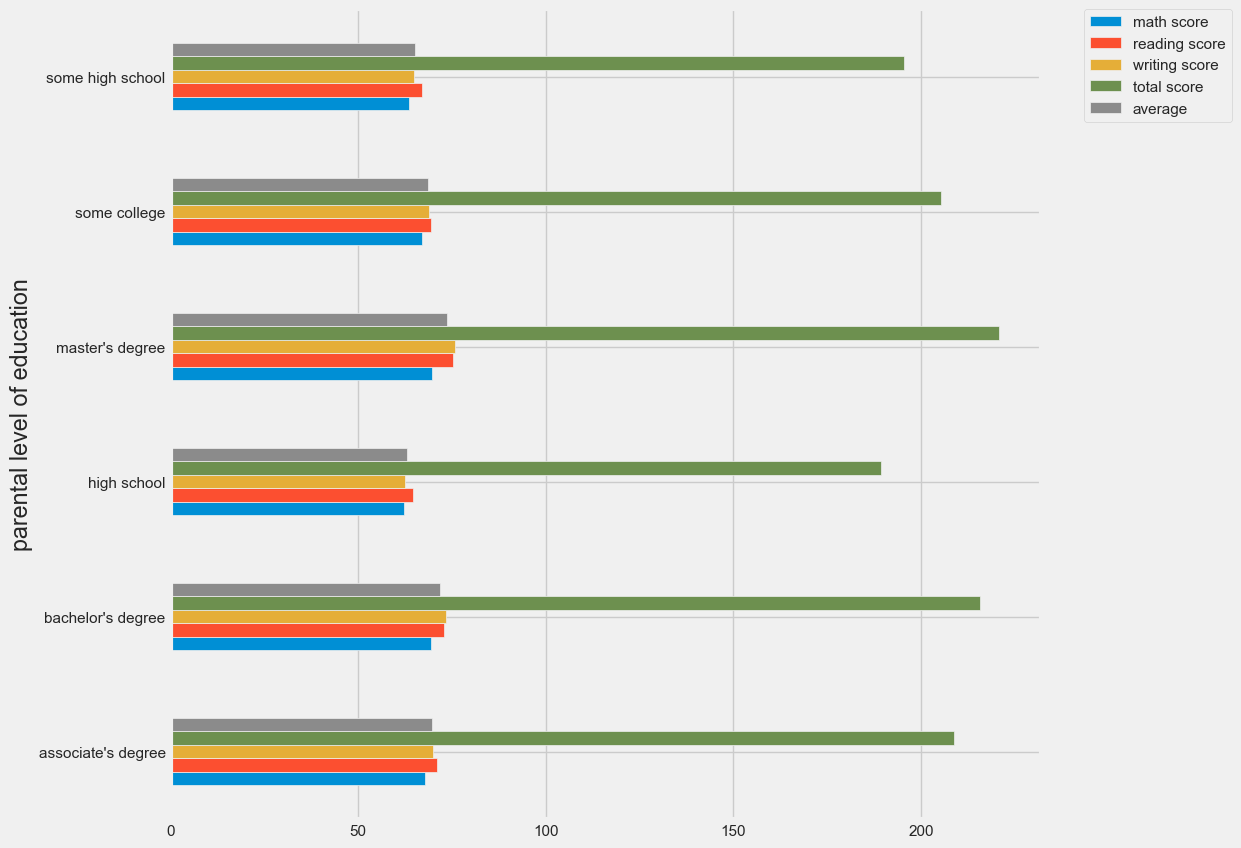

In [19]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

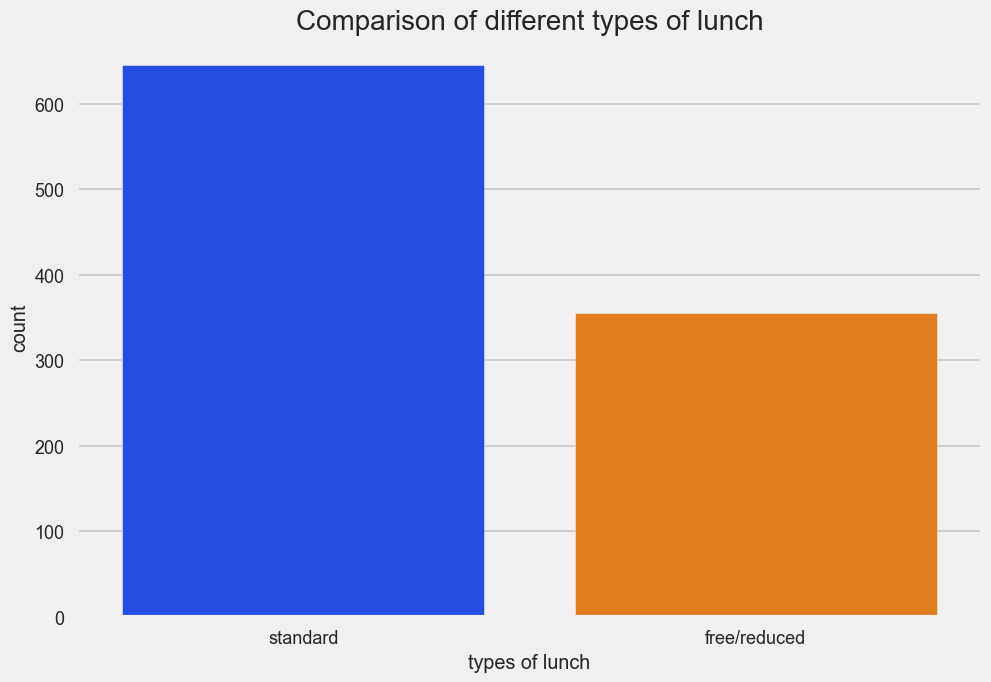

In [20]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'bright')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

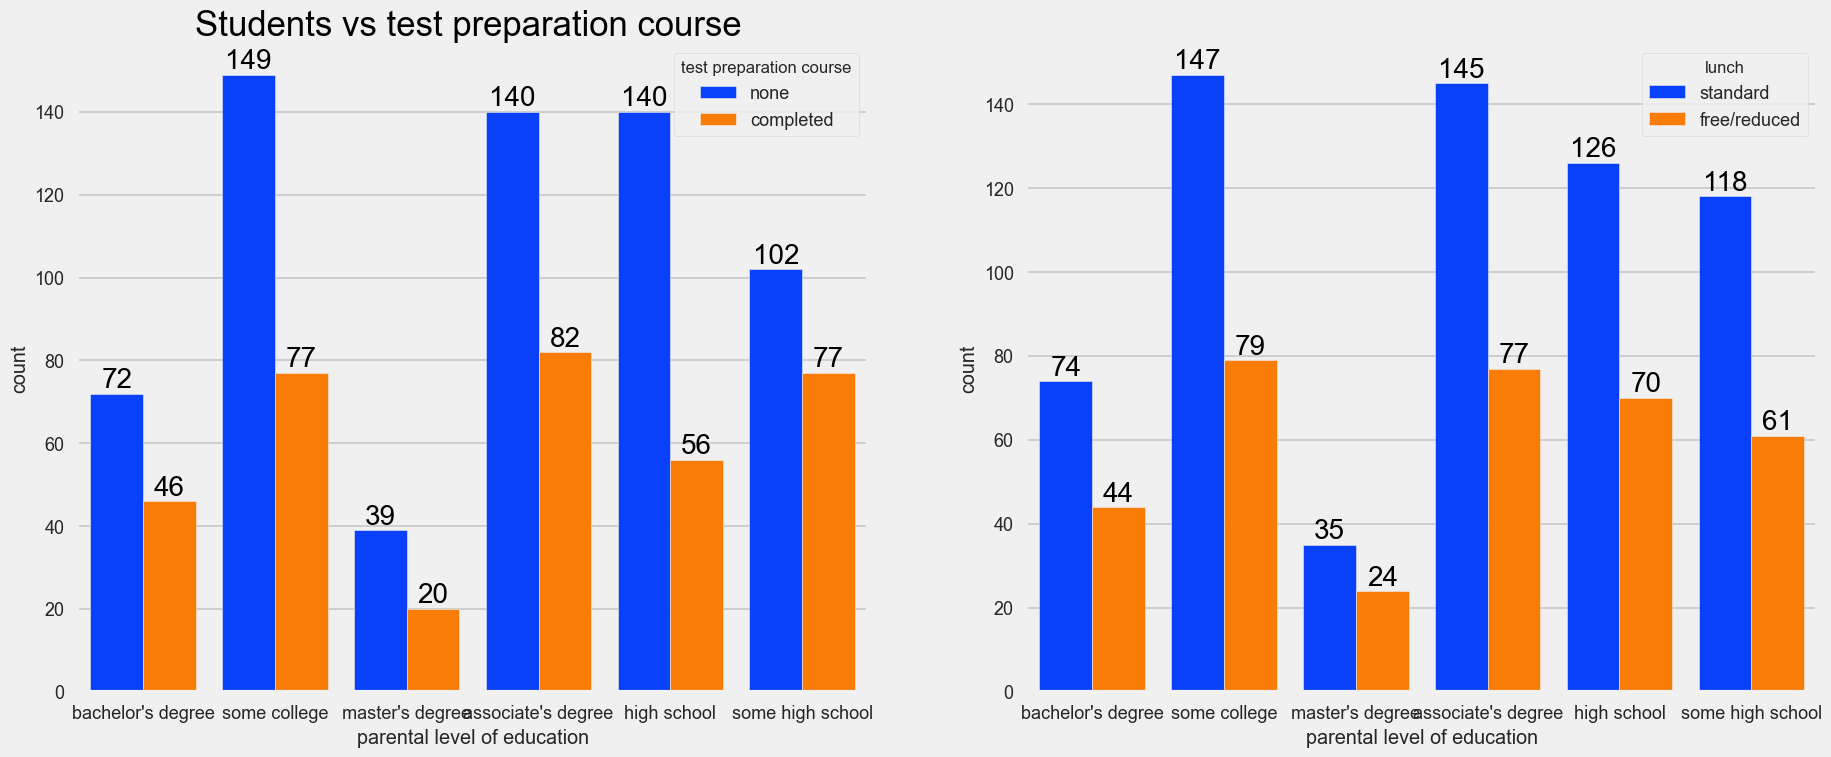

In [21]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<AxesSubplot:xlabel='lunch', ylabel='writing score'>

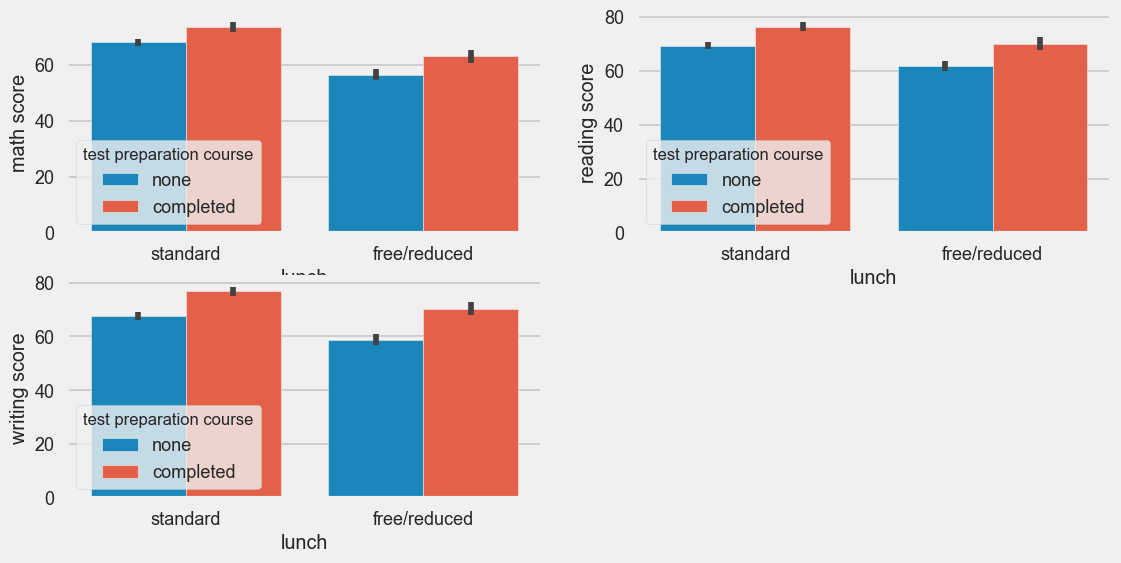

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

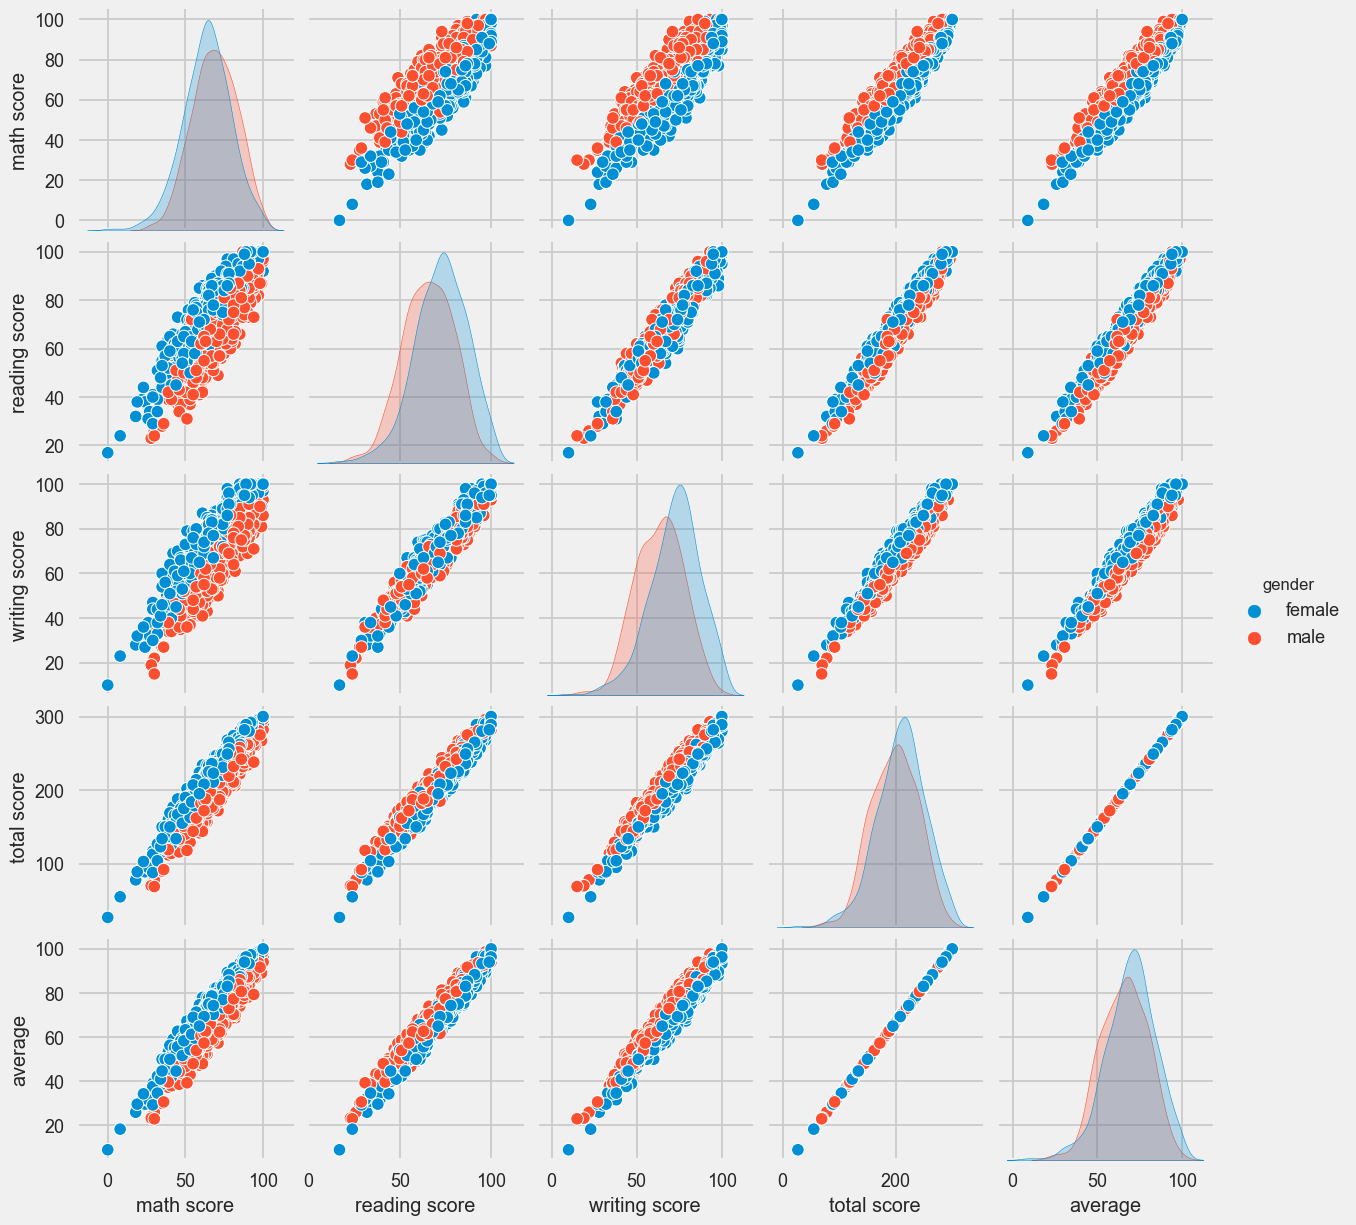

In [23]:
sns.pairplot(df,hue = 'gender')
plt.show()

In [24]:
catcol=[]
numcol=[]

for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        catcol.append(i)
    else:
        numcol.append(i)

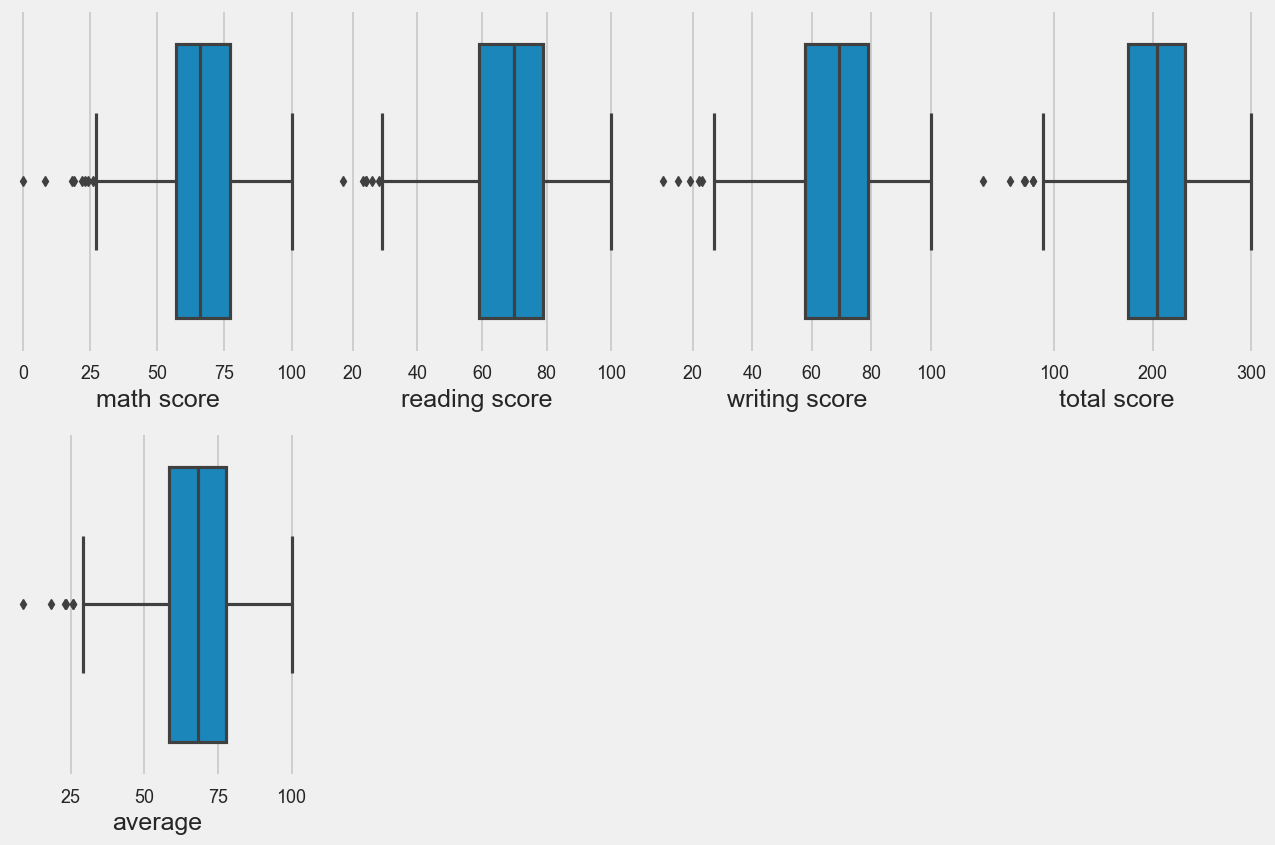

In [25]:
#checking outliers  of numerical columns
plt.figure(figsize=(13,25))
pltn=1
for i in numcol:
    if pltn<=23:
        ax=plt.subplot(6,4,pltn)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=18)
    pltn=pltn+1 
plt.tight_layout()  

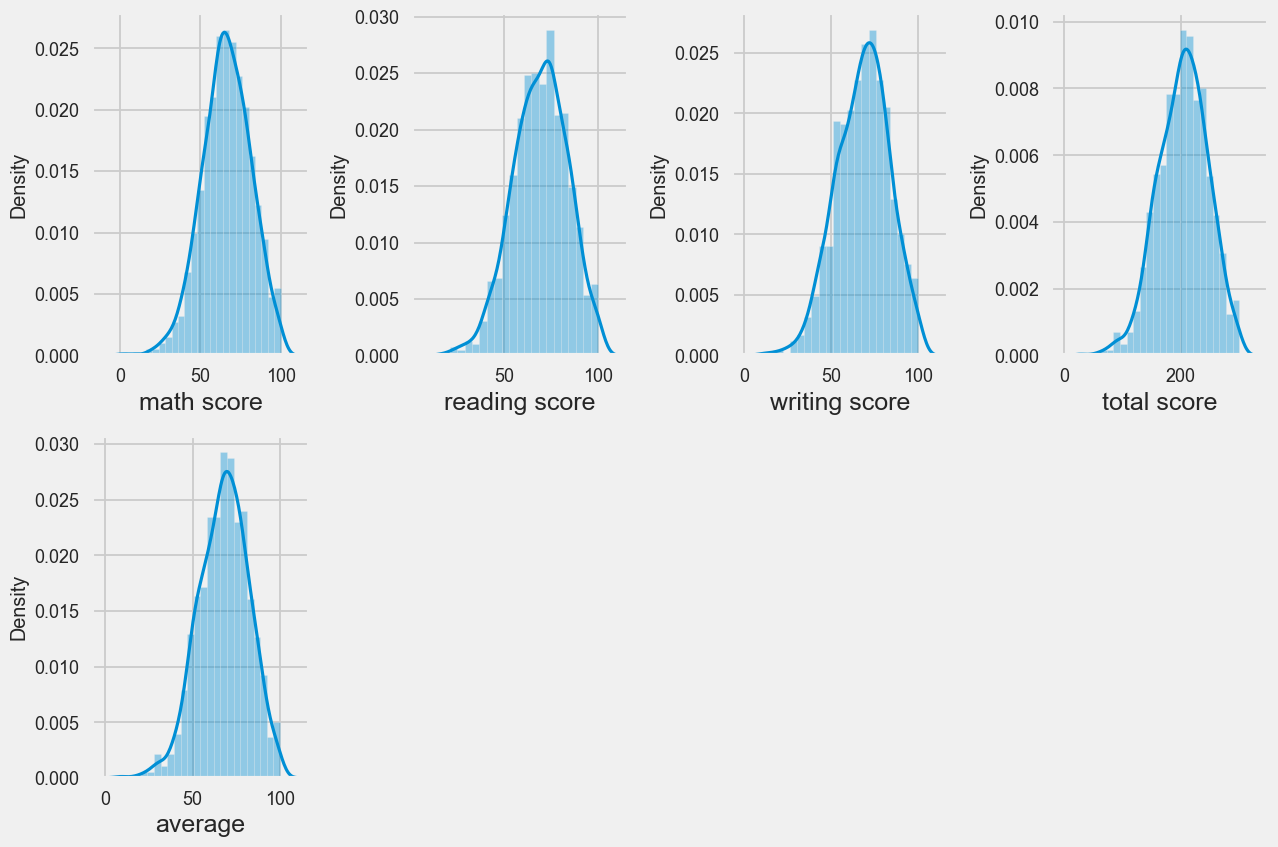

In [26]:
#checking skewness  of numerical columns
plt.figure(figsize=(13,25))
pltn=1
for i in numcol:
    if pltn<=23:
        ax=plt.subplot(6,4,pltn)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=18)
    pltn=pltn+1 
plt.tight_layout()

<AxesSubplot:>

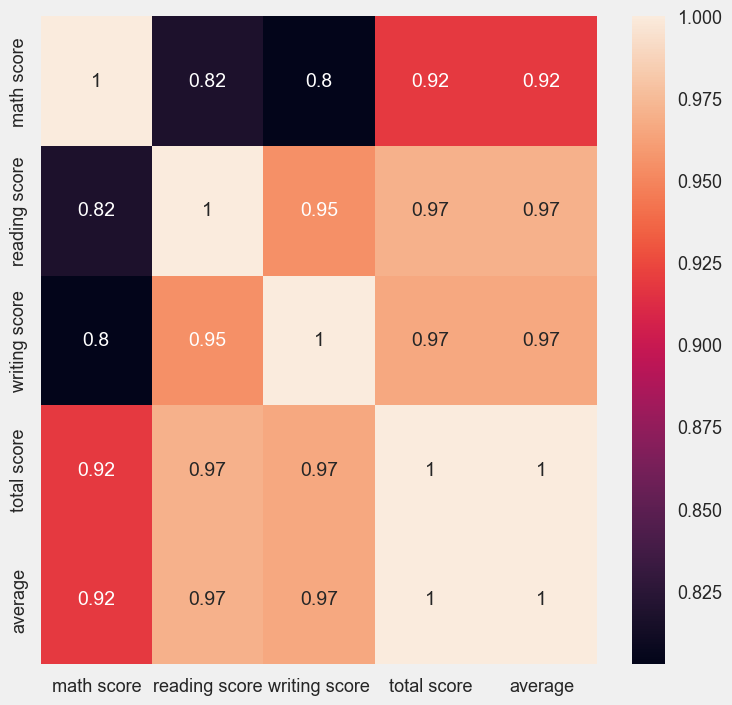

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.

In [28]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[['gender','race/ethnicity','parental level of education','lunch','test preparation course']]=oe.fit_transform(df[['gender','race/ethnicity','parental level of education','lunch','test preparation course']])

In [29]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,0.0,1.0,1.0,1.0,1.0,72,72,74,218,72.666667
1,0.0,2.0,4.0,1.0,0.0,69,90,88,247,82.333333
2,0.0,1.0,3.0,1.0,1.0,90,95,93,278,92.666667
3,1.0,0.0,0.0,0.0,1.0,47,57,44,148,49.333333
4,1.0,2.0,4.0,1.0,1.0,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,0.0,4.0,3.0,1.0,0.0,88,99,95,282,94.000000
996,1.0,2.0,2.0,0.0,1.0,62,55,55,172,57.333333
997,0.0,2.0,2.0,0.0,0.0,59,71,65,195,65.000000
998,0.0,3.0,4.0,1.0,0.0,68,78,77,223,74.333333


In [30]:
x = df.drop(columns=['total score'],axis=1)
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,0.0,1.0,1.0,1.0,1.0,72,72,74,72.666667
1,0.0,2.0,4.0,1.0,0.0,69,90,88,82.333333
2,0.0,1.0,3.0,1.0,1.0,90,95,93,92.666667
3,1.0,0.0,0.0,0.0,1.0,47,57,44,49.333333
4,1.0,2.0,4.0,1.0,1.0,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,0.0,4.0,3.0,1.0,0.0,88,99,95,94.000000
996,1.0,2.0,2.0,0.0,1.0,62,55,55,57.333333
997,0.0,2.0,2.0,0.0,0.0,59,71,65,65.000000
998,0.0,3.0,4.0,1.0,0.0,68,78,77,74.333333


In [31]:
y = df['total score']
y

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total score, Length: 1000, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [33]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
train=lr.score(xtrain,ytrain)
test=lr.score(xtest,ytest)

print(f'Training Score:{train}\n Testing Score{test}')

Training Score:1.0
 Testing Score1.0


In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)
print(f'MAE:{mae}\nMSE:{mse}\nRMSE:{rmse}\nAccuracy:{r2}')

MAE:1.4329278504495353e-15
MSE:3.7570815379326054e-29
RMSE:6.129503681320866e-15
Accuracy:1.0


In [43]:
from sklearn.linear_model import Ridge, Lasso
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_model.fit(xtrain, ytrain)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)  # alpha is the regularization strength
lasso_model.fit(xtrain, ytrain)

# Make predictions on the test set
ridge_predictions = ridge_model.predict(xtest)
lasso_predictions = lasso_model.predict(xtest)

# Calculate and print mean squared error
ridge_mse = mean_squared_error(ytest, ridge_predictions)
lasso_mse = mean_squared_error(ytest, lasso_predictions)

print("Ridge Mean Squared Error:", ridge_mse)
print("Lasso Mean Squared Error:", lasso_mse)

Ridge Mean Squared Error: 7.017114287356327e-09
Lasso Mean Squared Error: 0.005454861517658951


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
rf=RandomForestClassifier(max_depth=10, n_estimators=200)
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

In [36]:
train=rf.score(xtrain,ytrain)
test=rf.score(xtest,ytest)
print(f'classification_report:{classification_report(ytest,ypred)}')
print(f'confusion_matrix:{confusion_matrix(ytest,ypred)}')
print(f'accuracy_score:{accuracy_score(ytest,ypred)}')
print(f'Training Score:{train}\n Testing Score{test}')

classification_report:              precision    recall  f1-score   support

          27       0.00      0.00      0.00         1
          55       0.00      0.00      0.00         1
          78       0.00      0.00      0.00         1
          89       0.00      0.00      0.00         0
          94       0.00      0.00      0.00         0
         104       0.00      0.00      0.00         1
         112       0.00      0.00      0.00         1
         113       0.00      0.00      0.00         1
         114       0.00      0.00      0.00         0
         115       0.00      0.00      0.00         1
         116       0.00      0.00      0.00         0
         117       1.00      1.00      1.00         1
         118       0.00      0.00      0.00         1
         119       0.00      0.00      0.00         1
         124       0.00      0.00      0.00         0
         127       0.00      0.00      0.00         1
         129       0.00      0.00      0.00         0
     

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(xtrain,ytrain)
ypred=dtc.predict(xtest)
print(classification_report(ytest,ypred))
train=dtc.score(xtrain,ytrain)
test=dtc.score(xtest,ytest)
accuracy = accuracy_score(ytest, ypred)
print(f'Training Score:{train}\n Testing Score{test}\n Accuracy Score: {accuracy}')

              precision    recall  f1-score   support

          27       0.00      0.00      0.00         1
          55       0.00      0.00      0.00         1
          78       0.00      0.00      0.00         1
          89       0.00      0.00      0.00         0
          97       0.00      0.00      0.00         0
         104       0.00      0.00      0.00         1
         112       0.00      0.00      0.00         1
         113       0.00      0.00      0.00         1
         114       0.00      0.00      0.00         0
         115       0.00      0.00      0.00         1
         116       0.00      0.00      0.00         0
         117       0.00      0.00      0.00         1
         118       0.00      0.00      0.00         1
         119       1.00      1.00      1.00         1
         120       0.00      0.00      0.00         0
         127       0.00      0.00      0.00         1
         131       0.00      0.00      0.00         0
         132       0.00    

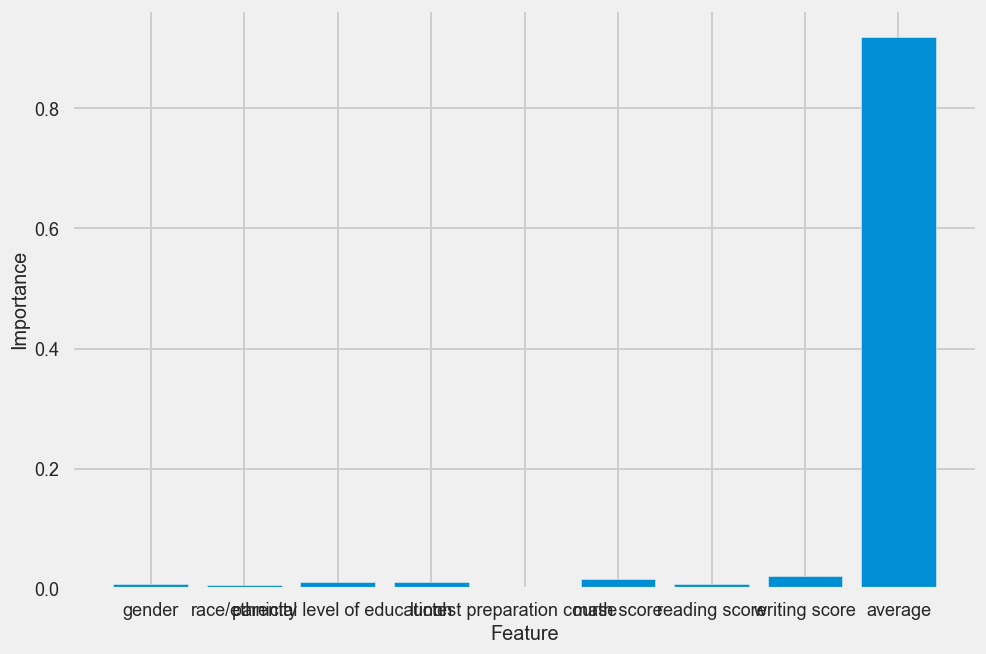

In [40]:
feature_importances = dtc.feature_importances_
features = x.columns
plt.bar(features, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(xtrain, ytrain)
ypred = gb.predict(xtest)
print("Classification Report:\n", classification_report(ytest, ypred))
train_score = gb.score(xtrain, ytrain)
test_score = gb.score(xtest, ytest)
accuracy = accuracy_score(ytest, ypred)
print(f'Training Score: {train_score}\nTesting Score: {test_score}\nAccuracy Score: {accuracy}')


Classification Report:
               precision    recall  f1-score   support

          27       0.00      0.00      0.00         1
          55       0.00      0.00      0.00         1
          69       0.00      0.00      0.00         0
          78       1.00      1.00      1.00         1
          94       0.00      0.00      0.00         0
         104       0.00      0.00      0.00         1
         112       0.00      0.00      0.00         1
         113       0.00      0.00      0.00         1
         114       0.00      0.00      0.00         0
         115       0.00      0.00      0.00         1
         116       0.00      0.00      0.00         0
         117       0.00      0.00      0.00         1
         118       0.00      0.00      0.00         1
         119       0.00      0.00      0.00         1
         124       0.00      0.00      0.00         0
         127       0.00      0.00      0.00         1
         131       0.00      0.00      0.00         0
   

In [46]:
from sklearn.ensemble import BaggingClassifier
bag= BaggingClassifier( n_estimators=50, random_state=42)
bag.fit(xtrain, ytrain)
ypred = bag.predict(xtest)
print("Classification Report:\n", classification_report(ytest, ypred))
train_score = bag.score(xtrain, ytrain)
test_score = bag.score(xtest, ytest)
accuracy = accuracy_score(ytest, ypred)
print(f'Training Score: {train_score}\nTesting Score: {test_score}\nAccuracy Score: {accuracy}')

Classification Report:
               precision    recall  f1-score   support

          27       0.00      0.00      0.00         1
          55       0.00      0.00      0.00         1
          78       0.00      0.00      0.00         1
          89       0.00      0.00      0.00         0
          94       0.00      0.00      0.00         0
         104       0.00      0.00      0.00         1
         112       0.00      0.00      0.00         1
         113       0.00      0.00      0.00         1
         114       0.00      0.00      0.00         0
         115       0.00      0.00      0.00         1
         116       0.00      0.00      0.00         0
         117       0.50      1.00      0.67         1
         118       0.00      0.00      0.00         1
         119       0.00      0.00      0.00         1
         127       0.00      0.00      0.00         1
         129       0.00      0.00      0.00         0
         131       0.00      0.00      0.00         0
   

Conclusion:

The Decision Tree and Gradient Boosting models demonstrate good generalization to new data.
Random Forest, while achieving a perfect training score, exhibits signs of overfitting and poor generalization.
Further analysis and refinement are recommended to optimize model performance and potentially explore advanced techniques.

In [62]:
pred_df=pd.DataFrame({'Actual Value':ytest,'Predicted Value':ypred,'Difference':ytest-ypred})
pred_df

,Actual Value,Predicted Value,Difference
507,168,167,1
818,200,201,-1
452,216,214,2
368,166,162,4
242,163,161,2
...,...,...,...
459,205,204,1
415,226,224,2
61,112,119,-7
347,266,268,-2


In [65]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

In [63]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [66]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(xtrain, ytrain) # Train model

    # Make predictions
    y_train_pred = model.predict(xtrain)
    y_test_pred = model.predict(xtest)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(ytrain, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(ytest, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.0718
- Mean Absolute Error: 0.0574
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0739
- Mean Absolute Error: 0.0595
- R2 Score: 1.0000


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0001
- Mean Absolute Error: 0.0001
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0001
- Mean Absolute Error: 0.0001
- R2 Score: 1.0000


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1.4654
- Mean Absolute Error: 1.0471
- R2 Score: 0.9988
-----------------------

In [67]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,1.000000
1,Lasso,0.999997
6,XGBRegressor,0.996203
5,Random Forest Regressor,0.995774
4,Decision Tree,0.995710
3,K-Neighbors Regressor,0.992780
7,AdaBoost Regressor,0.987741
